In [85]:
import pandas as pd
import geopandas as gpd

In [86]:
df = pd.read_excel("NFHS_5_Factsheets_Data.xls")

In [87]:

df =df[['States/UTs','Area','Children under 5 years who are stunted (height-for-age)18 (%)']]
df =df[df.Area=='Total']
df = df.drop(columns=["Area"])
df.columns = ['states', 'stunted_children']

In [88]:
df.head()

,states,stunted_children
2,India,35.47
5,Andaman & Nicobar Islands,22.47
8,Andhra Pradesh,31.16
11,Arunachal Pradesh,27.98
14,Assam,35.29


In [89]:
state_name_map = {
    'Andaman & Nicobar Islands': 'Andaman & Nicobar',
    'Dadra and Nagar Haveli & Daman and Diu': 'DNHDD',  # prioritize one; see note below
    'NCT of Delhi': 'Delhi',
    'Maharastra': 'Maharashtra'

}
df['states'] = df['states'].replace(state_name_map)


In [90]:
gdf = gpd.read_file("INDIA_STATES.geojson")

# Replace STNAME values to merge
gdf['STNAME_SH'] = gdf['STNAME_SH'].replace({
    'Dadra & Nagar Haveli': 'Daman & Diu'
    
})

# Dissolve rows with same state name into a single geometry
gdf = gdf.dissolve(by='STNAME_SH', as_index=False)
gdf['STNAME_SH'] = gdf['STNAME_SH'].replace('Daman & Diu', 'DNHDD')




In [91]:
# merge dataframes on state names
final = gdf.merge(df, left_on='STNAME_SH', right_on='states')


In [92]:
final

,STNAME_SH,geometry,STNAME,STCODE11,Shape_Length,Shape_Area,OBJECTID_1,OBJECTID,State_LGD,Shape_Leng,MaxSimpTol,MinSimpTol,states,stunted_children
0,Andaman & Nicobar,"MULTIPOLYGON (((92.56474 10.80546, 92.57249 10...",ANDAMAN & NICOBAR,35,4.249865e+06,7.613319e+09,21,21,35,4.249865e+06,300,300,Andaman & Nicobar,22.47
1,Andhra Pradesh,"MULTIPOLYGON (((80.79252 15.75617, 80.79352 15...",ANDHRA PRADESH,37,5.257129e+06,1.773080e+11,31,31,28,5.257129e+06,300,300,Andhra Pradesh,31.16
2,Arunachal Pradesh,"POLYGON ((96.09428 29.45477, 96.08208 29.46173...",ARUNACHAL PRADESH,12,2.937127e+06,1.057817e+11,1,1,12,2.937127e+06,300,300,Arunachal Pradesh,27.98
3,Assam,"POLYGON ((95.97166 27.96254, 95.8238 27.97157,...",ASSAM,18,3.409654e+06,9.816875e+10,2,2,18,3.409654e+06,300,300,Assam,35.29
4,Bihar,"POLYGON ((84.11673 27.51951, 84.10796 27.52163...",BIHAR,10,3.102534e+06,1.164765e+11,22,22,10,3.102534e+06,300,300,Bihar,42.94
5,Chandigarh,"POLYGON ((76.78275 30.78923, 76.77148 30.79527...",CHANDIGARH,04,6.571123e+04,1.561981e+08,3,3,4,6.571123e+04,300,300,Chandigarh,25.3
6,Chhattisgarh,"POLYGON ((83.32988 24.10169, 83.32147 24.10603...",CHHATTISGARH,22,3.449518e+06,1.565398e+11,4,4,22,3.449518e+06,300,300,Chhattisgarh,34.6
7,DNHDD,"MULTIPOLYGON (((73.2151 20.11806, 73.21066 20....",DAMAN & DIU,25,8.710005e+04,1.055022e+08,34,34,25,8.710005e+04,300,300,DNHDD,39.42
8,Delhi,"POLYGON ((77.08754 28.87546, 77.0824 28.88381,...",DELHI,07,2.609922e+05,1.932519e+09,5,5,7,2.609922e+05,300,300,Delhi,30.87
9,Goa,"POLYGON ((73.85648 15.80076, 73.84674 15.78644...",GOA,30,4.333050e+05,3.921762e+09,6,6,30,4.333050e+05,300,300,Goa,25.77


In [93]:
final['stunted_children'] = pd.to_numeric(final['stunted_children'], errors='coerce')


STUNTING MAP DATA SUMMARY
DataFrame shape: (36, 14)
Columns: ['STNAME_SH', 'geometry', 'STNAME', 'STCODE11', 'Shape_Length', 'Shape_Area', 'OBJECTID_1', 'OBJECTID', 'State_LGD', 'Shape_Leng', 'MaxSimpTol', 'MinSimpTol', 'states', 'stunted_children']

Stunting Statistics:
count    36.000000
mean     31.222500
std       6.227565
min      19.980000
25%      26.587500
50%      31.085000
75%      35.252500
max      46.540000
Name: stunted_children, dtype: float64

States with highest stunting rates:
        STNAME_SH  stunted_children
22      Meghalaya             46.54
4           Bihar             42.94
33  Uttar Pradesh             39.71
14      Jharkhand             39.58
7           DNHDD             39.42

States with lowest stunting rates:
            STNAME_SH  stunted_children
26         Puducherry             19.98
29             Sikkim             22.33
0   Andaman & Nicobar             22.47
16             Kerala             23.41
21            Manipur             23.43


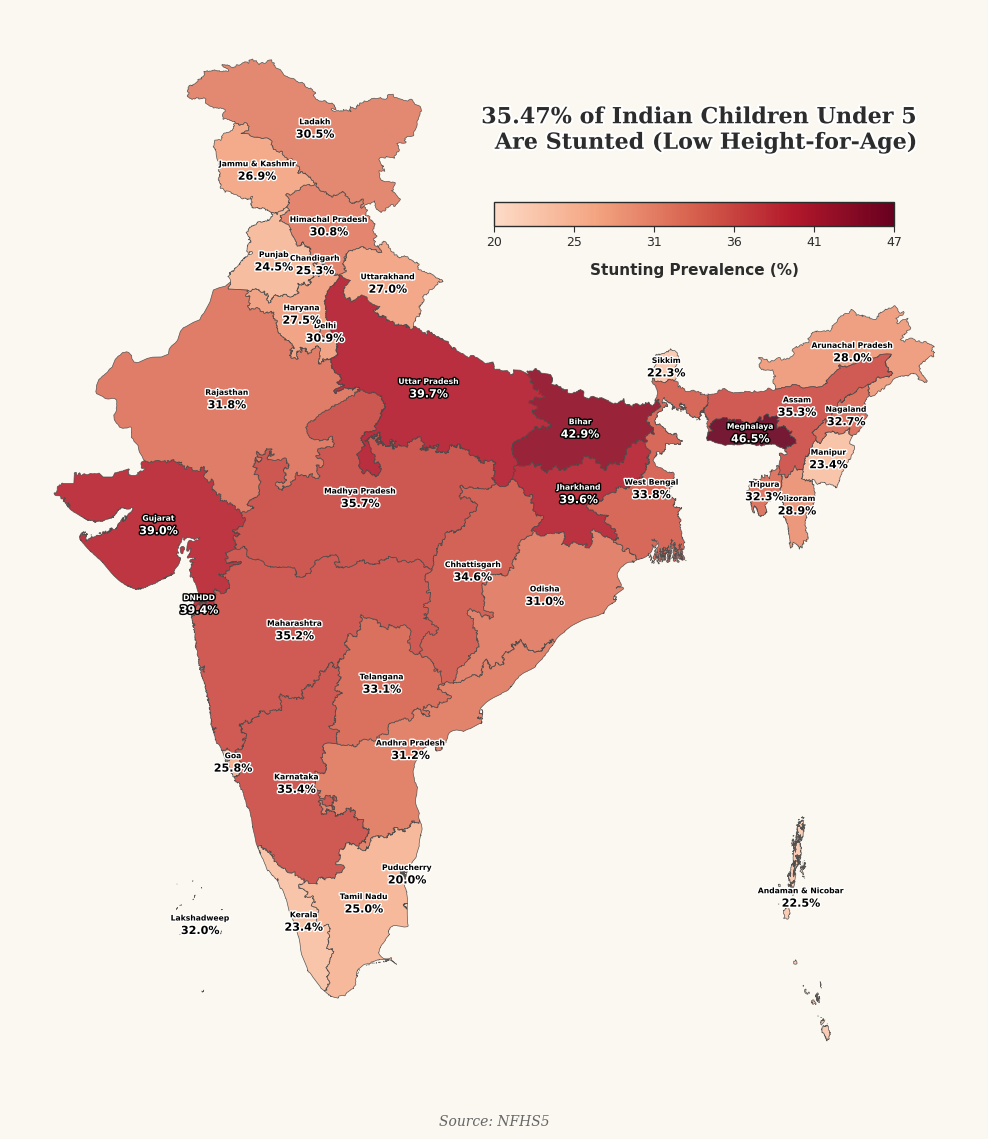

In [106]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap
import matplotlib.cm as cm
import matplotlib.patheffects as path_effects
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')

def create_stunting_map(final_df):
    fig = plt.figure(figsize=(16, 12))
    fig.patch.set_facecolor('#faf8f0')

    ax_map = plt.axes([0.05, 0.05, 0.9, 0.9])
    ax_map.set_facecolor('#faf8f0')

    # colors_list = ['#fef7e6', '#fed8a6', '#feb366', '#fd8d3c', '#f03b20', '#bd0026', '#800026']
    # colors_list = ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#3182bd', '#08519c']
    # colors_list = ['#fff7ec', '#fee8c8', '#fdd49e', '#fdbb84', '#fc8d59', '#e34a33', '#b30000']
    colors_list = ['#fddbc7', '#f4a582', '#d6604d', '#b2182b', '#67001f']




    custom_cmap = LinearSegmentedColormap.from_list('stunting_cmap', colors_list, N=256)
    

    norm = Normalize(vmin=final_df['stunted_children'].min(), vmax=final_df['stunted_children'].max())

    colors = final_df['stunted_children'].apply(
        lambda x: custom_cmap(norm(x)) if pd.notnull(x) else (0.95, 0.95, 0.95, 1.0)
    )

    final_df.plot(
        ax=ax_map,
        color=colors.tolist(),
        edgecolor='#4a4a4a',
        linewidth=0.5,
        alpha=0.9
    )

    def get_text_color(value):
        if pd.isnull(value):
            return 'black'
        normalized_val = norm(value)
        return 'white' if normalized_val > 0.6 else 'black'

    for _, row in final_df.iterrows():
        if pd.notnull(row['STNAME_SH']):
            point = row['geometry'].centroid
            text_color = get_text_color(row['stunted_children'])
            outline_color = 'black' if text_color == 'white' else 'white'

            ax_map.text(
                point.x, point.y + 0.2, row['STNAME_SH'],
                ha='center', va='center', fontsize=5.5, fontweight='bold',
                color=text_color, fontfamily='sans-serif',
                path_effects=[path_effects.withStroke(linewidth=2, foreground=outline_color)]
            )

            if pd.notnull(row['stunted_children']):
                ax_map.text(
                    point.x, point.y - 0.2, f"{row['stunted_children']:.1f}%",
                    ha='center', va='center', fontsize=8, fontweight='bold',
                    color=text_color, fontfamily='sans-serif',
                    path_effects=[path_effects.withStroke(linewidth=2, foreground=outline_color)]
                )

    title = ax_map.set_title(
        '',
        fontsize=24, fontweight='bold', fontfamily='serif',
        pad=30, color='#2c2c2c'
    )
    title.set_path_effects([path_effects.withStroke(linewidth=3, foreground='white')])

    ax_map.set_axis_off()

    sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=norm)
    sm._A = []

    # Horizontal colorbar
    cbar_ax = fig.add_axes([0.50, 0.77, 0.25, 0.02])
    cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')

    cbar.ax.tick_params(labelsize=9, colors='#2c2c2c', length=4)
    cbar.set_label('Stunting Prevalence (%)', fontsize=11, fontweight='bold',
                   color='#2c2c2c', labelpad=10)
    cbar.outline.set_edgecolor('#2c2c2c')
    cbar.outline.set_linewidth(1)

    tick_positions = np.linspace(final_df['stunted_children'].min(), final_df['stunted_children'].max(), 6)
    cbar.set_ticks(tick_positions)
    cbar.set_ticklabels([f'{x:.0f}' for x in tick_positions])

    # === Large annotation above colorbar ===
    fig.text(
        0.63, 0.85,
        '35.47% of Indian Children Under 5 \n Are Stunted (Low Height-for-Age)',
        ha='center', va='center',
        fontsize=16, fontweight='bold', fontfamily='serif', color='#2c2c2c',
        path_effects=[path_effects.withStroke(linewidth=3, foreground='white')]
    )

    # Footer
    plt.figtext(
        0.5, 0.02,
        'Source: NFHS5',
        ha='center', fontsize=10, color='#666666',
        style='italic', fontfamily='serif'
    )

    ax_map.grid(True, alpha=0.1, color='gray', linewidth=0.5)

    plt.tight_layout()
    return fig

def debug_data(final_df):
    print("=" * 50)
    print("STUNTING MAP DATA SUMMARY")
    print("=" * 50)
    print(f"DataFrame shape: {final_df.shape}")
    print(f"Columns: {final_df.columns.tolist()}")
    print("\nStunting Statistics:")
    print(final_df['stunted_children'].describe())
    print(f"\nStates with highest stunting rates:")
    print(final_df.nlargest(5, 'stunted_children')[['STNAME_SH', 'stunted_children']])
    print(f"\nStates with lowest stunting rates:")
    print(final_df.nsmallest(5, 'stunted_children')[['STNAME_SH', 'stunted_children']])
    print("=" * 50)

# === Execution ===
if __name__ == "__main__":
    # Ensure numeric conversion
    final['stunted_children'] = pd.to_numeric(final['stunted_children'], errors='coerce')

    debug_data(final)
    map_fig = create_stunting_map(final)

    map_fig.savefig('stunting_map_enhanced.png', dpi=300, bbox_inches='tight',
                    facecolor=map_fig.get_facecolor(), edgecolor='none')
    map_fig.savefig('stunting_map_enhanced.pdf', bbox_inches='tight',
                    facecolor=map_fig.get_facecolor(), edgecolor='none')

    plt.show()
